In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from xgboost import XGBClassifier, plot_importance as xg_importance
#from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

from scipy.stats import norm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
#from xgboost import XGBClassifier, plot_importance as xg_importance
#from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

# RAW 데이터 분석

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

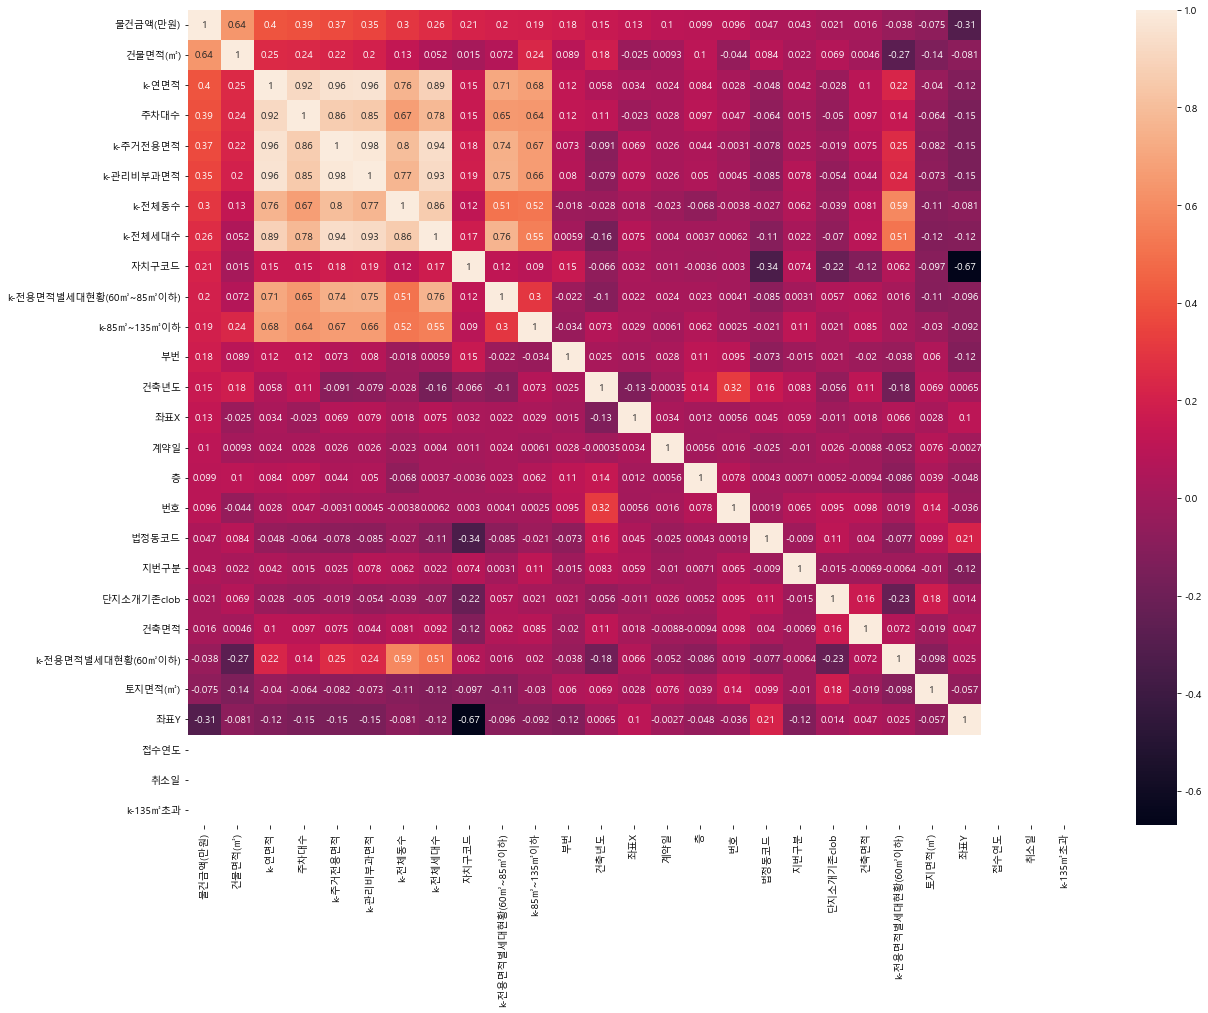

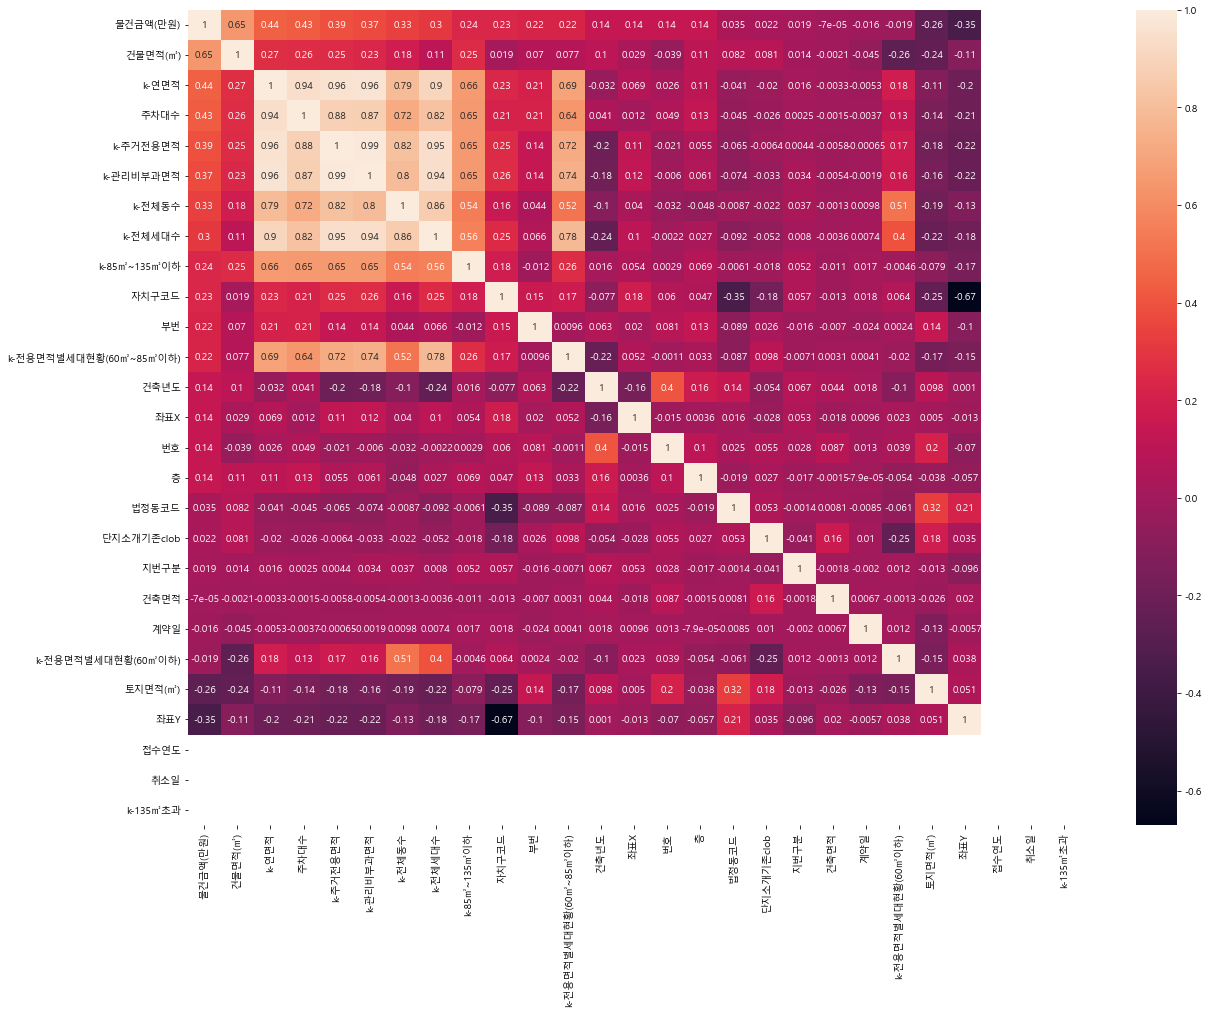

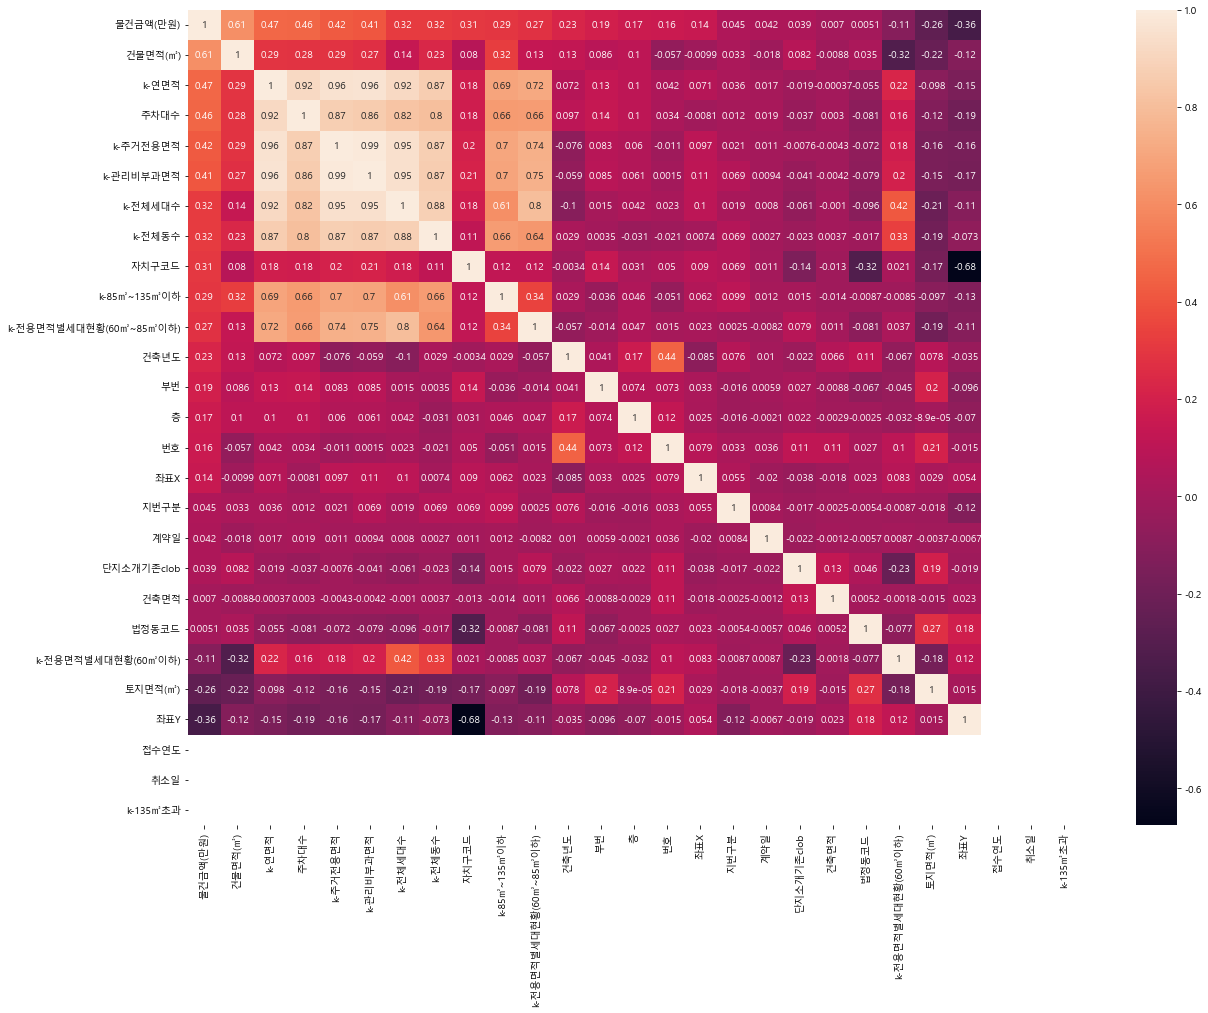

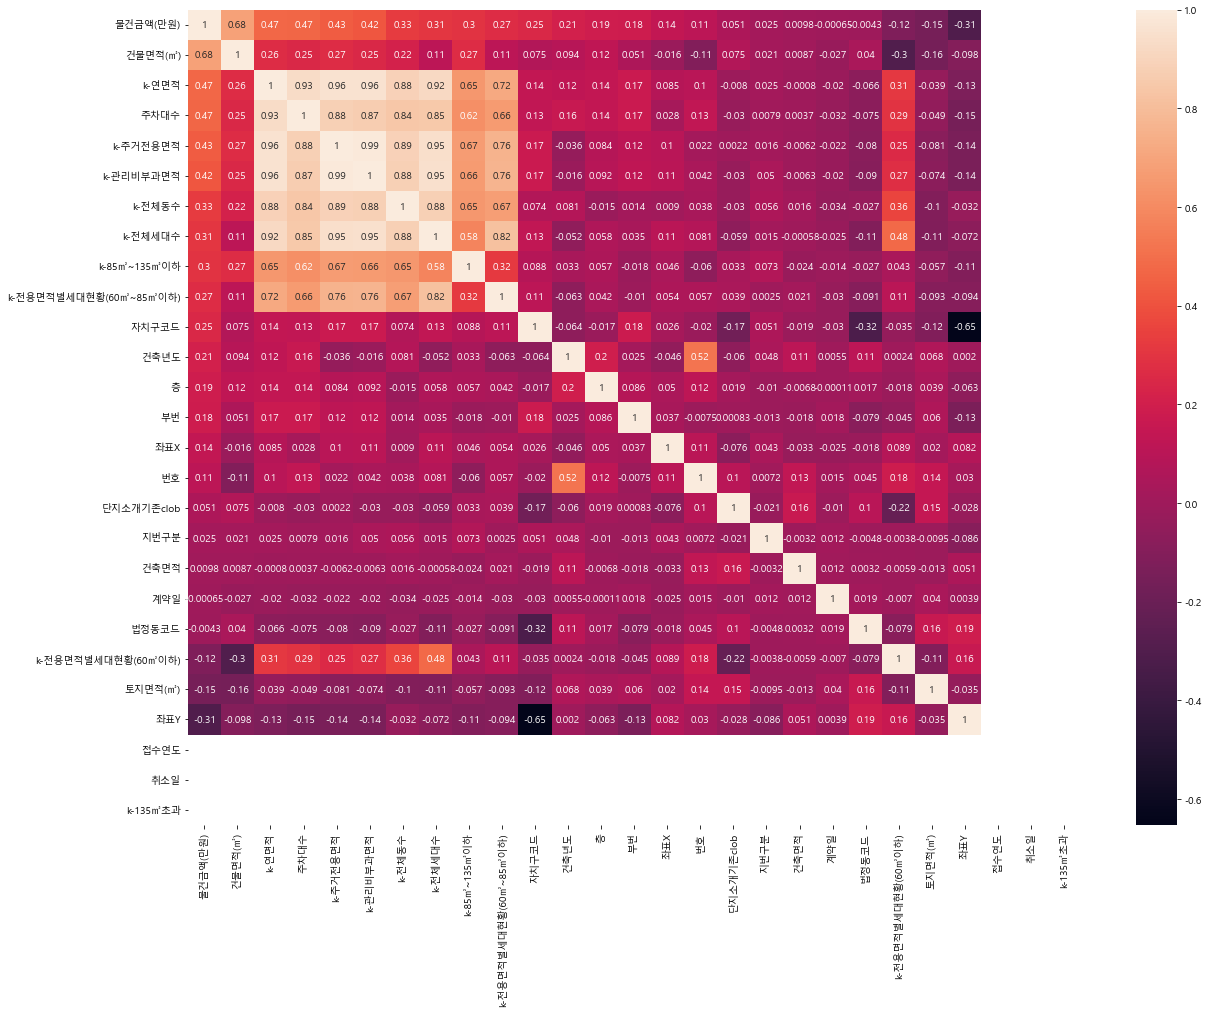

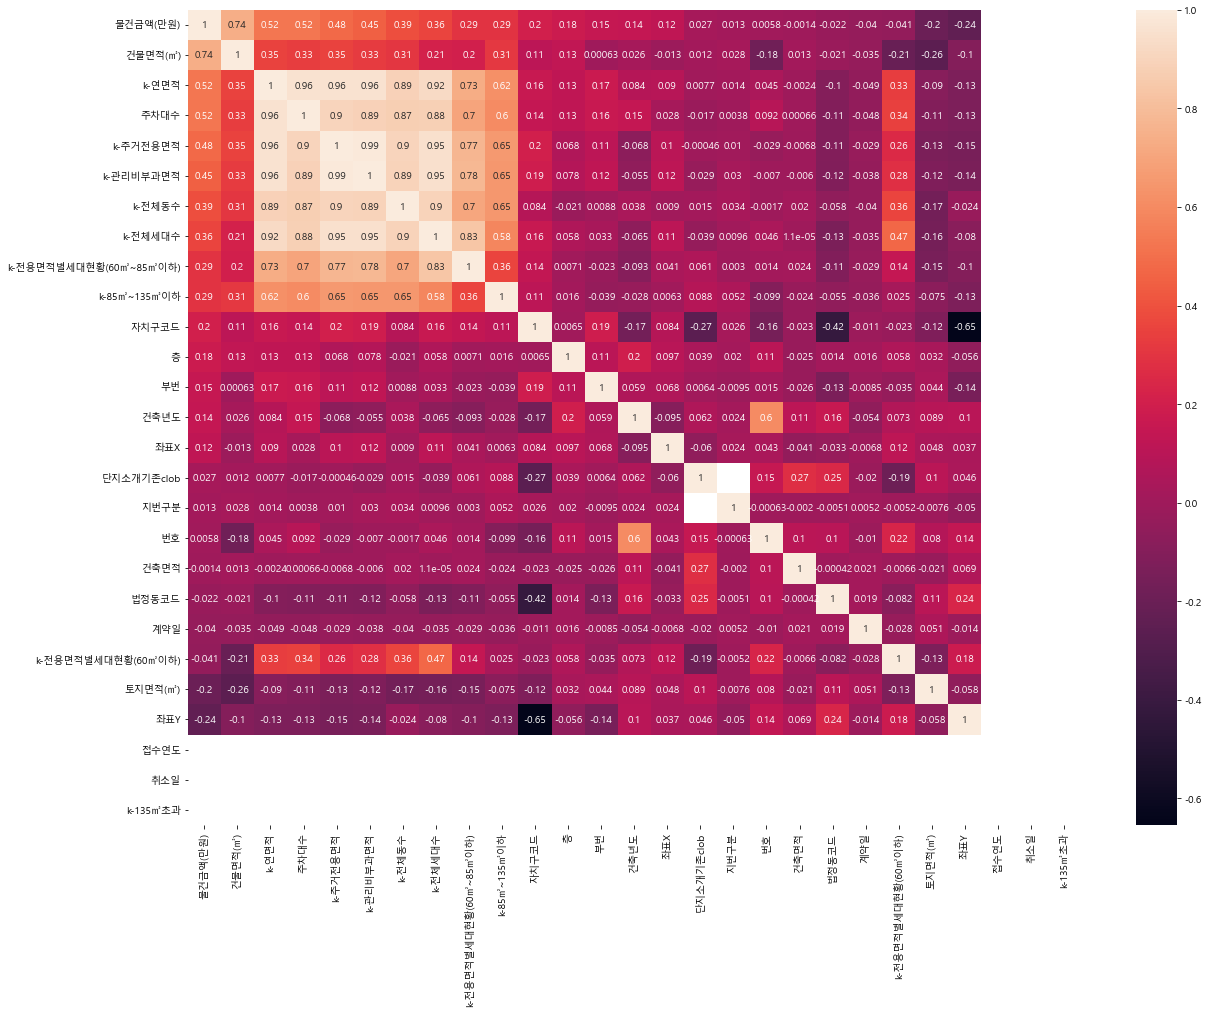

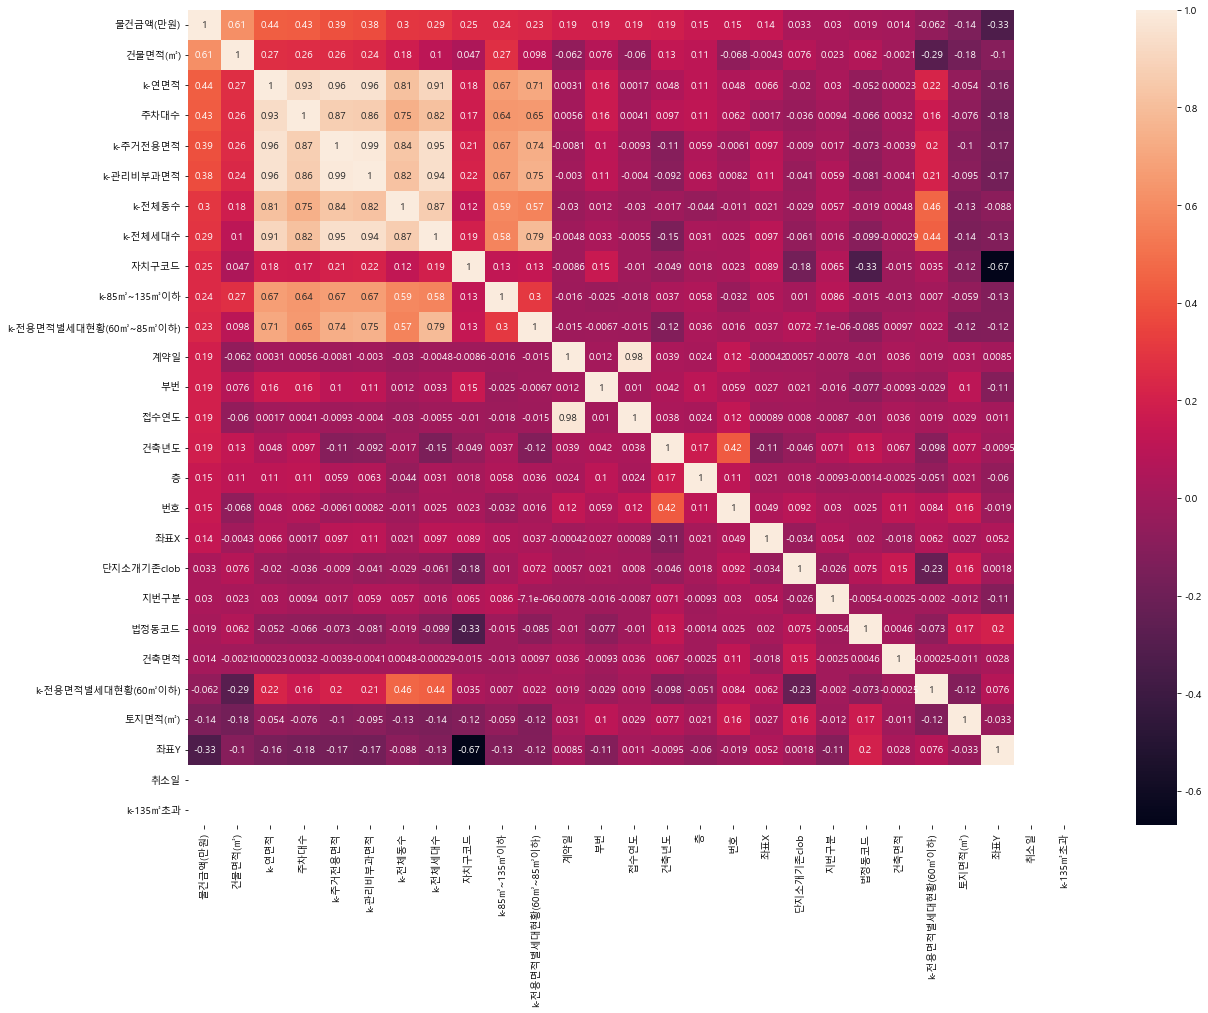

In [3]:
town = pd.read_csv("서울시 부동산 실거래가 정보.csv",  encoding='cp949')
town_wh = town.astype({'신고구분' : 'string'})
town_real = town_wh[town_wh["권리구분"].isnull()]
town_on = town_real[town_real["취소일"].isnull()]
town_on_18 = town_on[town_on["접수연도"] == 2018]
town_on_19 = town_on[town_on["접수연도"] == 2019]
town_on_20 = town_on[town_on["접수연도"] == 2020]
town_on_21 = town_on[town_on["접수연도"] == 2021]
town_on_22 = town_on[town_on["접수연도"] == 2022]
town_on_18_21 = town_on[town_on["접수연도"] != 2022]
apar = pd.read_csv("서울시 공동주택 아파트 정보.csv", encoding='cp949')
town_bfp18 = pd.merge(town_on_18, apar, left_on=['자치구명', '건물명'], right_on=['주소(시군구)', 'k-아파트명'])
town_bfp19 = pd.merge(town_on_19, apar, left_on=['자치구명', '건물명'], right_on=['주소(시군구)', 'k-아파트명'])
town_bfp20 = pd.merge(town_on_20, apar, left_on=['자치구명', '건물명'], right_on=['주소(시군구)', 'k-아파트명'])
town_bfp21 = pd.merge(town_on_21, apar, left_on=['자치구명', '건물명'], right_on=['주소(시군구)', 'k-아파트명'])
town_bfp22 = pd.merge(town_on_22, apar, left_on=['자치구명', '건물명'], right_on=['주소(시군구)', 'k-아파트명'])
town_bfp18_21 = pd.merge(town_on_18_21, apar, left_on=['자치구명', '건물명'], right_on=['주소(시군구)', 'k-아파트명'])
town_list = [town_bfp18, town_bfp19, town_bfp20, town_bfp21, town_bfp22, town_bfp18_21]
for i in town_list:    
    corr=i.corr()
    top_corr=i[corr.nlargest(40,'물건금액(만원)')['물건금액(만원)'].index].corr()
    figure, ax1 = plt.subplots(nrows=1, ncols=1)
    figure.set_size_inches(20,15)
    sns.heatmap(top_corr, annot=True, ax=ax1)

보고서에 명시한 이유에 따라 2019년도 데이터만을 이용

In [4]:
town_bfp19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12092 entries, 0 to 12091
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   접수연도                    12092 non-null  int64  
 1   자치구코드                   12092 non-null  int64  
 2   자치구명                    12092 non-null  object 
 3   법정동코드                   12092 non-null  int64  
 4   법정동명                    12092 non-null  object 
 5   지번구분                    12092 non-null  float64
 6   지번구분명                   12092 non-null  object 
 7   본번                      12092 non-null  object 
 8   부번                      12092 non-null  float64
 9   건물명                     12092 non-null  object 
 10  계약일                     12092 non-null  int64  
 11  물건금액(만원)                12092 non-null  int64  
 12  건물면적(㎡)                 12092 non-null  float64
 13  토지면적(㎡)                 1660 non-null   float64
 14  층                       12092 non-null

In [5]:
town.nunique()

접수연도                    6
자치구코드                  25
자치구명                   25
법정동코드                  86
법정동명                  420
지번구분                    3
지번구분명                   3
본번                   3510
부번                   1296
건물명                 58185
계약일                  1754
물건금액(만원)            14046
건물면적(㎡)             28395
토지면적(㎡)             12557
층                      75
권리구분                    2
취소일                   898
건축년도                  106
건물용도                    4
신고구분                    2
신고한 개업공인중개사 시군구명      671
dtype: int64

In [6]:
town.isnull().sum()

접수연도                     0
자치구코드                    0
자치구명                     0
법정동코드                    0
법정동명                     0
지번구분                 48854
지번구분명                48854
본번                   48844
부번                   48844
건물명                  48863
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)             158503
층                    48817
권리구분                634342
취소일                 622974
건축년도                  2588
건물용도                     0
신고구분                580846
신고한 개업공인중개사 시군구명    596129
dtype: int64

과도한 결측치를 가지고 있는 데이터들과 분석에 상관없는 데이터들을 제거

In [7]:
town_bfp19.drop_duplicates(keep = 'first')

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,정릉풍림아이원,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
1,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,정릉풍림아이원,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
2,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,정릉풍림아이원,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
3,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,정릉풍림아이원,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
4,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,정릉풍림아이원,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12087,2019,11440,마포구,12700,상암동,1.0,대지,1741,0.0,상암월드컵파크11단지,...,위탁,5393.13,658.0,임대,2013-06-23 15:20:13.0,Y,N,126.882139,37.587704,2013-03-07 09:47:02.0
12088,2019,11650,서초구,10600,잠원동,1.0,대지,0065,33.0,신반포22,...,직영,0.00,185.0,기타,2013-06-20 10:34:19.0,Y,N,127.007905,37.512457,2013-03-07 09:46:39.0
12089,2019,11470,양천구,10300,신월동,1.0,대지,1036,0.0,수명산롯데캐슬,...,위탁,2870.67,235.0,의무,2013-05-24 10:45:01.0,Y,N,126.828498,37.544545,2013-03-07 09:46:22.0
12090,2019,11410,서대문구,12000,남가좌동,1.0,대지,377.0,0.0,DMC래미안클라시스,...,위탁,0.00,171.0,임대,2013-11-19 11:26:27.0,Y,N,126.916072,37.578662,2013-03-07 09:46:51.0


In [8]:
del_list = ["k-홈페이지", "k-전화번호", "k-팩스번호", "단지소개기존clob", "단지첨부파일", "신고한 개업공인중개사 시군구명", "토지면적(㎡)"]
for i in del_list:    
    town_bfp19 = town_bfp19.drop(i, axis=1)
town_bfp19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12092 entries, 0 to 12091
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   접수연도                    12092 non-null  int64  
 1   자치구코드                   12092 non-null  int64  
 2   자치구명                    12092 non-null  object 
 3   법정동코드                   12092 non-null  int64  
 4   법정동명                    12092 non-null  object 
 5   지번구분                    12092 non-null  float64
 6   지번구분명                   12092 non-null  object 
 7   본번                      12092 non-null  object 
 8   부번                      12092 non-null  float64
 9   건물명                     12092 non-null  object 
 10  계약일                     12092 non-null  int64  
 11  물건금액(만원)                12092 non-null  int64  
 12  건물면적(㎡)                 12092 non-null  float64
 13  층                       12092 non-null  float64
 14  권리구분                    0 non-null    

In [9]:
town_bfp19.to_csv('2019년도 중복제거 실거래 데이터.csv',encoding='cp949')

In [10]:
df = pd.read_csv("2019년도 중복제거 실거래 데이터.csv", encoding='cp949')
df

,Unnamed: 0,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,0,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
1,1,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
2,2,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
3,3,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
4,4,2019,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,...,위탁,0.00,0.0,의무,2013-06-23 12:57:14.0,Y,N,127.007323,37.618589,2013-03-07 09:46:32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12087,12087,2019,11440,마포구,12700,상암동,1.0,대지,1741.0,0.0,...,위탁,5393.13,658.0,임대,2013-06-23 15:20:13.0,Y,N,126.882139,37.587704,2013-03-07 09:47:02.0
12088,12088,2019,11650,서초구,10600,잠원동,1.0,대지,65.0,33.0,...,직영,0.00,185.0,기타,2013-06-20 10:34:19.0,Y,N,127.007905,37.512457,2013-03-07 09:46:39.0
12089,12089,2019,11470,양천구,10300,신월동,1.0,대지,1036.0,0.0,...,위탁,2870.67,235.0,의무,2013-05-24 10:45:01.0,Y,N,126.828498,37.544545,2013-03-07 09:46:22.0
12090,12090,2019,11410,서대문구,12000,남가좌동,1.0,대지,377.0,0.0,...,위탁,0.00,171.0,임대,2013-11-19 11:26:27.0,Y,N,126.916072,37.578662,2013-03-07 09:46:51.0


# 수치형 데이터 전처리

## 타겟변수 로그변환

<AxesSubplot:xlabel='물건금액(만원)', ylabel='Density'>

<AxesSubplot:xlabel='물건금액(만원)', ylabel='Density'>

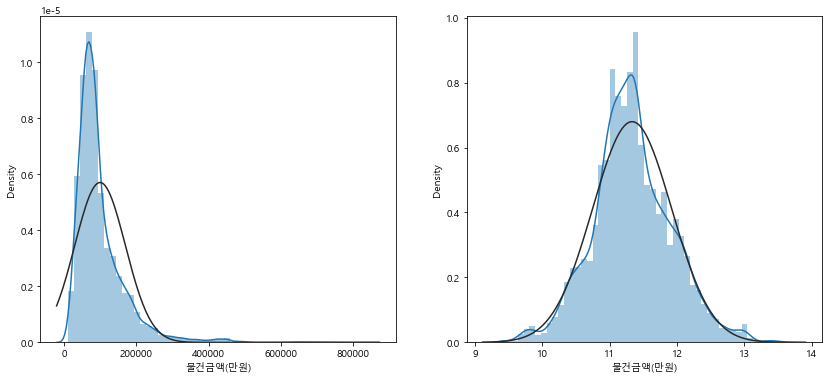

In [11]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df['물건금액(만원)'], fit=norm, ax=ax1)
sns.distplot(np.log(df['물건금액(만원)']+1), fit=norm, ax=ax2)

## 수치형 변수와 타겟변수간의 상관계수 확인

<AxesSubplot:>

<AxesSubplot:>

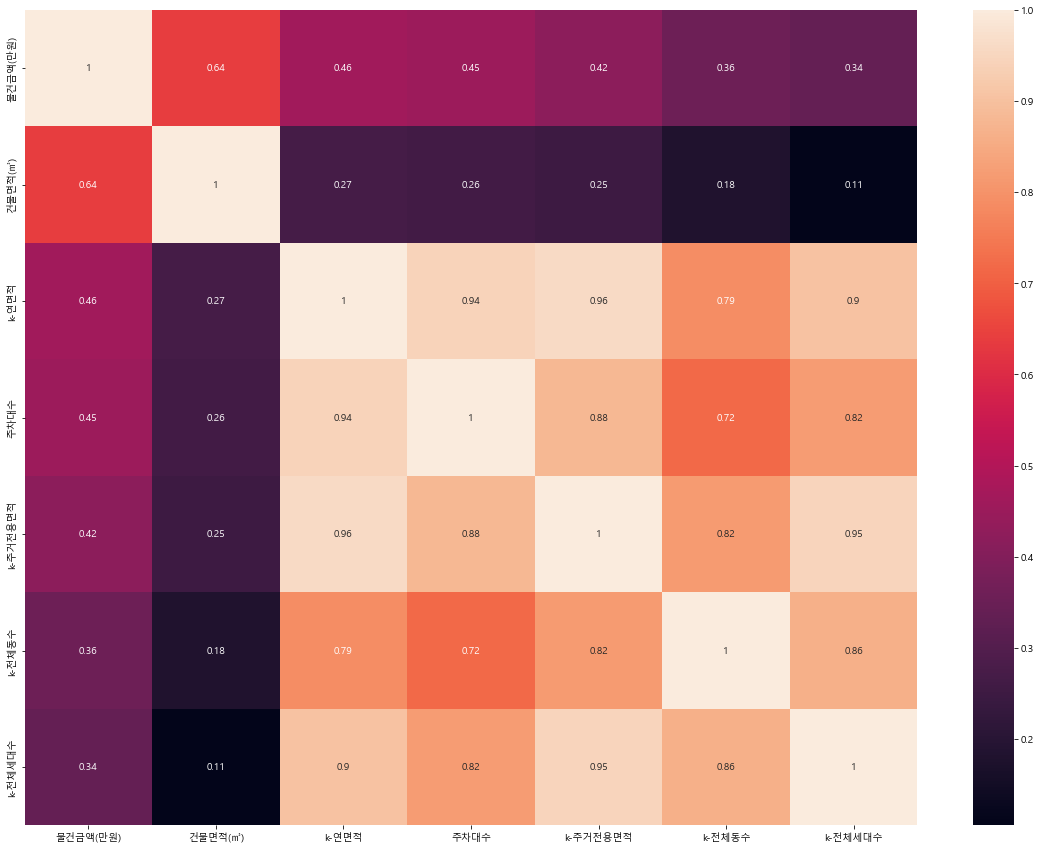

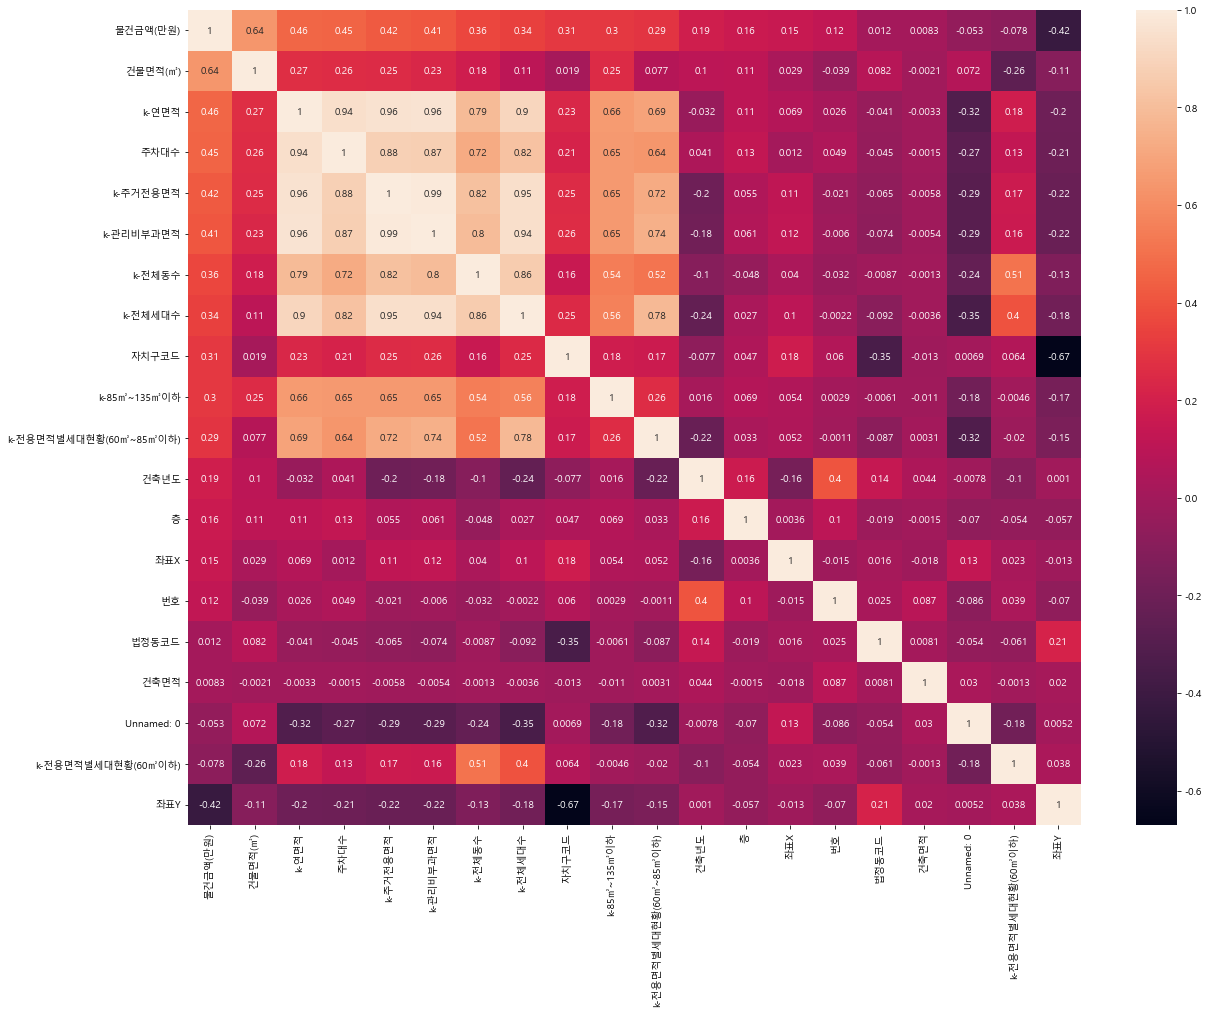

In [12]:
df1 = df.drop_duplicates()
town_tg = df
drop_list = ["접수연도", "지번구분", "본번", "부번", "계약일", "취소일", "권리구분","신고구분", "k-135㎡초과", "k-등록일자", "k-수정일자"]

for i in  drop_list:
    town_tg = town_tg.drop(i, axis = 1)

town_tg_num = town_tg[["물건금액(만원)","건물면적(㎡)", "k-연면적", "주차대수", "k-주거전용면적", "k-전체동수", "k-전체세대수",
          ]]

town_tg_num['물건금액(만원)'] = np.log(town_tg_num['물건금액(만원)'])
corr=town_tg_num.corr()
top_corr=town_tg_num[corr.nlargest(40,'물건금액(만원)')['물건금액(만원)'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

town_tg['물건금액(만원)'] = np.log(town_tg['물건금액(만원)'])
corr=town_tg.corr()
top_corr=town_tg[corr.nlargest(40,'물건금액(만원)')['물건금액(만원)'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

물건가격과 연관이 높은 변수들 중, 연면적과 연관관계가 매우 높은 변수들을 확인

residual plot 이용하여 주차대수와 전체동수 제거 과정

In [13]:
df_checkin_by_regplot = df[['k-연면적','주차대수','k-주거전용면적']]
df_checkin_by_regplot.isnull().sum()

k-연면적        0
주차대수        36
k-주거전용면적    19
dtype: int64

In [14]:
print("주차대수 0값:",len(df_checkin_by_regplot[(df_checkin_by_regplot['주차대수'] == 0 )]),'\n',
     "연면적 0값:",len(df_checkin_by_regplot[(df_checkin_by_regplot['k-연면적'] == 0 )]),'\n',
     "주거전용면적 0값:",len(df_checkin_by_regplot[(df_checkin_by_regplot['k-주거전용면적'] == 0 )]))

주차대수 0값: 883 
 연면적 0값: 90 
 주거전용면적 0값: 0


residual plot 확인과정에서 0과 결측치값제거하고 판단

In [15]:
df_checkin_by_regplot = df_checkin_by_regplot[(df_checkin_by_regplot['k-연면적'] != 0 )]
df_checkin_by_regplot_cut0 = df_checkin_by_regplot[(df_checkin_by_regplot['주차대수'] != 0 )]

<AxesSubplot:xlabel='주차대수', ylabel='k-연면적'>

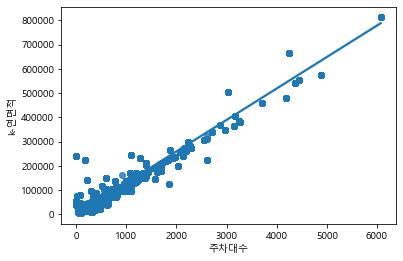

In [16]:
sns.regplot(df_checkin_by_regplot_cut0['주차대수'], df_checkin_by_regplot_cut0['k-연면적'])

<AxesSubplot:xlabel='주차대수', ylabel='k-연면적'>

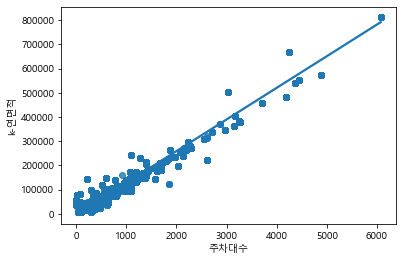

In [17]:
df=df.drop(df[(df['주차대수']<500) & (df['k-연면적']>200000)].index)
df_checkin_by_regplot_cut0=df_checkin_by_regplot_cut0.drop(df_checkin_by_regplot_cut0[(df_checkin_by_regplot_cut0['주차대수']<500) & (df_checkin_by_regplot_cut0['k-연면적']>200000)].index)
sns.regplot(df_checkin_by_regplot_cut0['주차대수'], df_checkin_by_regplot_cut0['k-연면적'])

전체 주차장의 데이터 결측치를 제거한 plot과 전체동수의 이상치를 제거한 plot을 통하여 연면적이 주차대수의 데이터를 대표할 수 있다고 판단, 모델의 attribute에서 제외

<AxesSubplot:xlabel='k-연면적', ylabel='k-주거전용면적'>

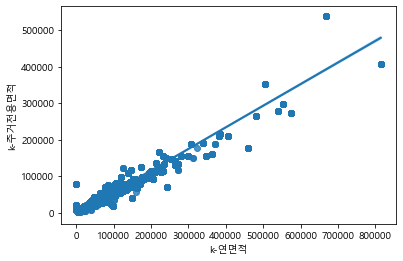

In [18]:
sns.regplot(df['k-연면적'], df['k-주거전용면적'])

주거전용 면적또한 히트맵의 계수와 residual plot을 통해 연면적이 이를 대표할 수 있다고 판단, 데이터를 모델에서 고려하지 않음

In [19]:
df_checkin_by_regplot = df[['k-연면적','건물면적(㎡)']]
df_checkin_by_regplot.isnull().sum()

k-연면적      0
건물면적(㎡)    0
dtype: int64

In [20]:
print("연면적 0값:",len(df_checkin_by_regplot[(df_checkin_by_regplot['k-연면적'] == 0 )]),'\n',
     "건물면적(㎡) 0값:",len(df_checkin_by_regplot[(df_checkin_by_regplot['건물면적(㎡)'] == 0 )]))

연면적 0값: 90 
 건물면적(㎡) 0값: 0


최종 변수 중 연면적 데이터의 0값을 제거

In [21]:
df=df.drop(df[df['k-연면적']==0].index)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11766 entries, 92 to 12091
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              11766 non-null  int64  
 1   접수연도                    11766 non-null  int64  
 2   자치구코드                   11766 non-null  int64  
 3   자치구명                    11766 non-null  object 
 4   법정동코드                   11766 non-null  int64  
 5   법정동명                    11766 non-null  object 
 6   지번구분                    11766 non-null  float64
 7   지번구분명                   11766 non-null  object 
 8   본번                      11766 non-null  float64
 9   부번                      11766 non-null  float64
 10  건물명                     11766 non-null  object 
 11  계약일                     11766 non-null  int64  
 12  물건금액(만원)                11766 non-null  int64  
 13  건물면적(㎡)                 11766 non-null  float64
 14  층                       11766 non-nul

# 범주형 데이터 선택 및 처리
* 범주형 변수를 처리하는 과정
1. 일차적으로 결측값이 50% 넘는 변수들을 일차적으로 제거
    -> 이거에 해당하는 거 다시 찾기
2. 다음은 타겟변수(물건금액)과 상관관계가 높거나 변수간의 상관관계가 높은 변수는 주관적, 선택적으로 삭제

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='자치구명', ylabel='물건금액(만원)'>

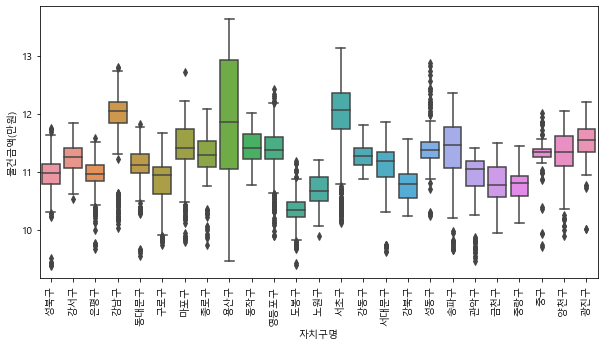

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='법정동명', ylabel='물건금액(만원)'>

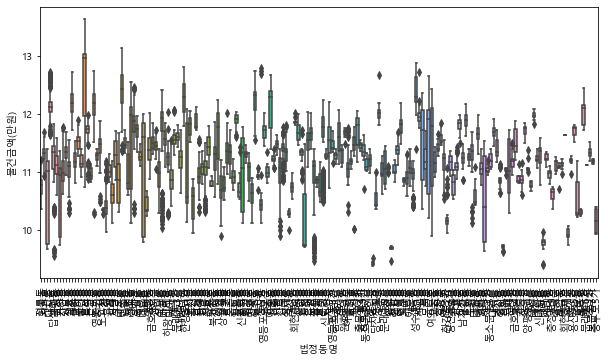

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='건축년도', ylabel='물건금액(만원)'>

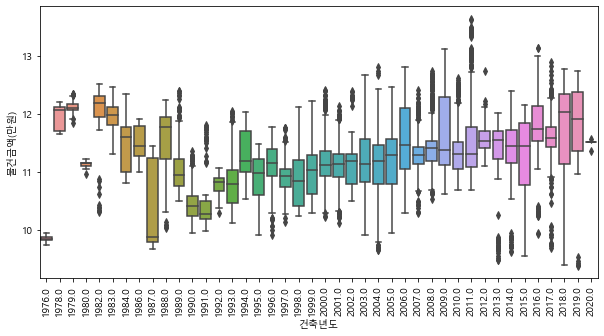

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='건물용도', ylabel='물건금액(만원)'>

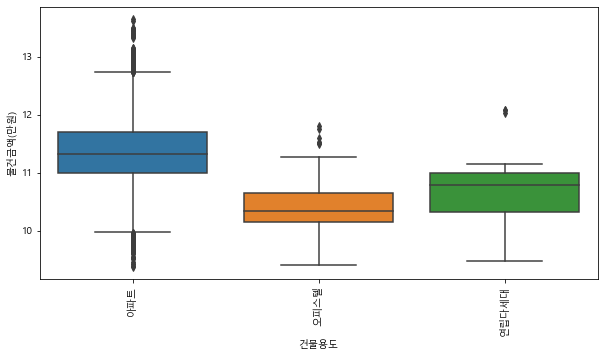

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='k-단지분류(아파트,주상복합등등)', ylabel='물건금액(만원)'>

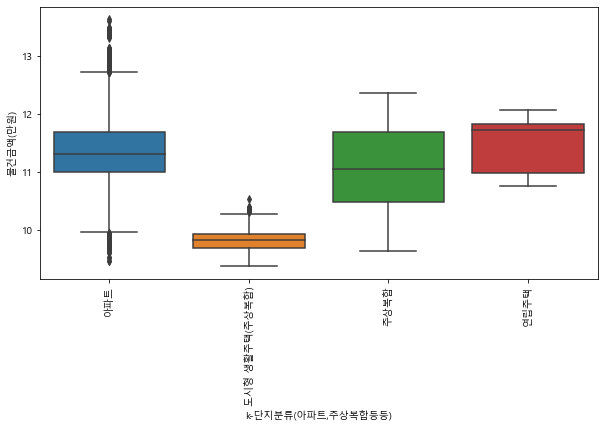

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='k-세대타입(분양형태)', ylabel='물건금액(만원)'>

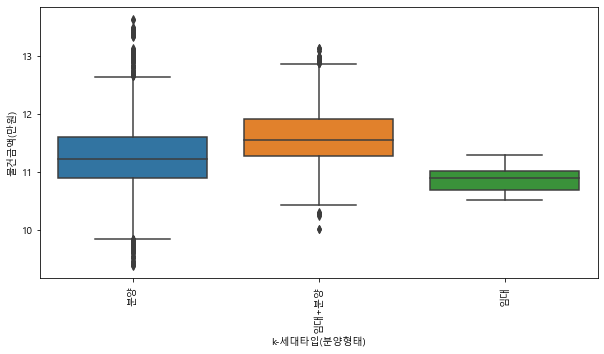

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='k-복도유형', ylabel='물건금액(만원)'>

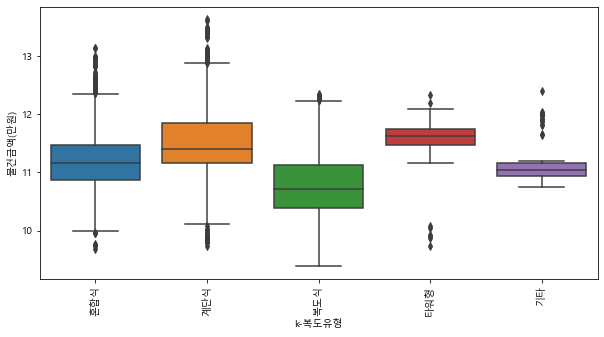

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='경비비관리형태', ylabel='물건금액(만원)'>

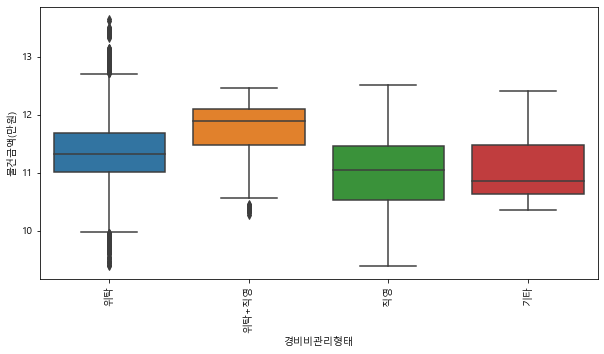

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='세대전기계약방법', ylabel='물건금액(만원)'>

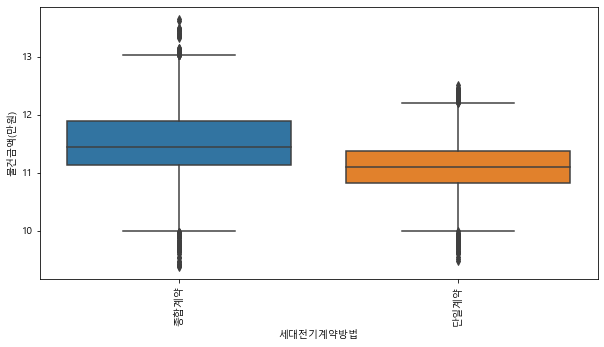

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='청소비관리형태', ylabel='물건금액(만원)'>

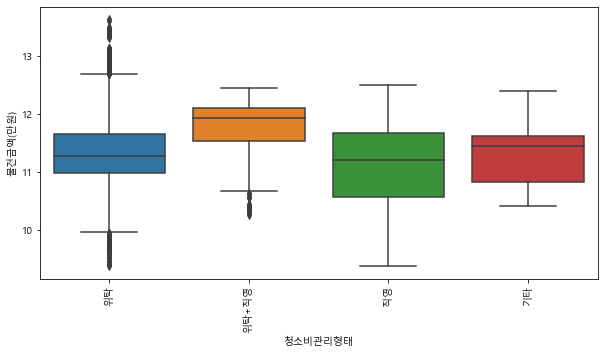

<Figure size 720x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='기타/의무/임대/임의=1/2/3/4', ylabel='물건금액(만원)'>

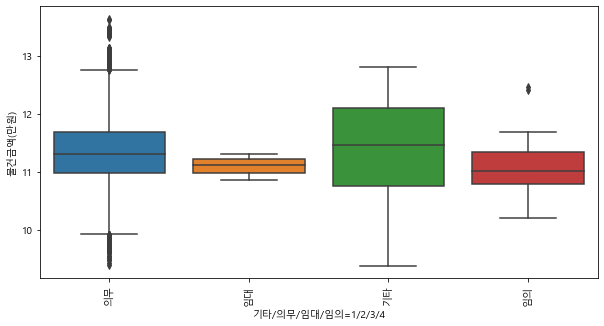

In [50]:
df_gu = pd.read_csv("2019년도 중복제거 실거래 데이터.csv", encoding='cp949')

#df_gu = df_gu[df_gu['자치구명']=='강남구']

df_cate = df_gu[['물건금액(만원)','법정동명','자치구명','건축년도','건물용도','k-단지분류(아파트,주상복합등등)','k-세대타입(분양형태)','k-관리방식','k-복도유형','k-난방방식','경비비관리형태','세대전기계약방법','청소비관리형태','기타/의무/임대/임의=1/2/3/4']]
df_cate['물건금액(만원)'] = np.log(df_gu['물건금액(만원)'])
for i in ['자치구명','법정동명','건축년도','건물용도','k-단지분류(아파트,주상복합등등)','k-세대타입(분양형태)','k-복도유형','경비비관리형태','세대전기계약방법','청소비관리형태','기타/의무/임대/임의=1/2/3/4']:
    
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    sns.boxplot(x=i, y="물건금액(만원)", data=df_cate)
    plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='k-난방방식', ylabel='물건금액(만원)'>

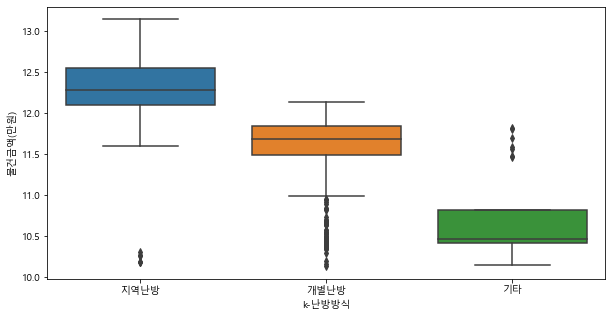

In [46]:
df0= pd.read_csv("2019년도 중복제거 실거래 데이터.csv", encoding='cp949')
df0['물건금액(만원)'] = np.log(df0['물건금액(만원)'])
df0 = df0[df0['자치구명']=='서초구']
plt.figure(figsize=(10,5))
#plt.xticks(rotation=90)
sns.boxplot(x="k-난방방식", y="물건금액(만원)", data=df0)
plt.show()

* k-단지분류보다 타겟 변수와의 상관관계가 높은 건물용도 변수의 요인에는 '도시형 생활주택(주상복합)' 에 대한 정보가 없음
* k-단지분류의 데이터를 이용해서 건물용도 변수에 주상복합 요인을 맵핑하여 추가할 것임

In [53]:
df_cate.loc[df_cate['k-단지분류(아파트,주상복합등등)']=='도시형 생활주택(주상복합)', '건물용도']='도시형 생활주택(주상복합)'

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='건물용도', ylabel='물건금액(만원)'>

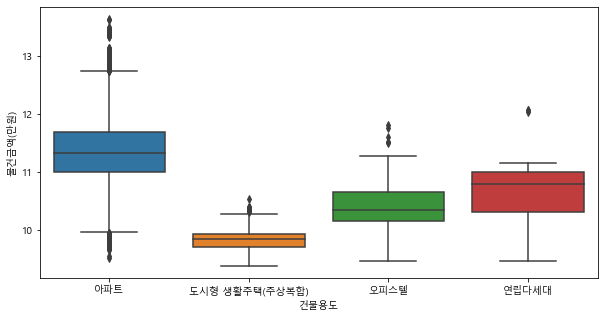

In [55]:
plt.figure(figsize=(10,5))
#plt.xticks(rotation=90)
sns.boxplot(x="건물용도", y="물건금액(만원)", data=df_cate)
plt.show()

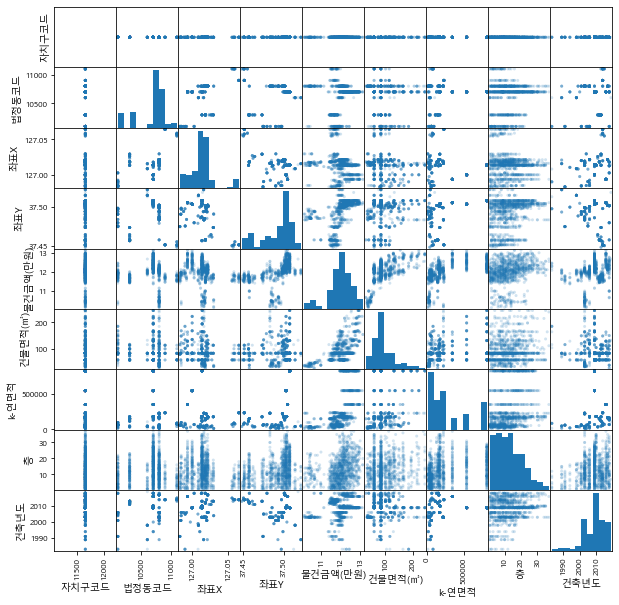

In [34]:
from pandas.plotting import scatter_matrix

corr_matrix = df.corr()
attributes = ['자치구코드', '법정동코드', '건물명', 'k-아파트코드', '자치구명', '법정동명', '좌표X', '좌표Y',
       '물건금액(만원)', '건물면적(㎡)', 'k-연면적', '층', '건축년도', '건물용도', 'k-세대타입(분양형태)',
       'k-복도유형', 'k-난방방식', '세대전기계약방법']
fig = scatter_matrix(df[attributes], figsize = (10,10), alpha = 0.2)

<AxesSubplot:xlabel='건물면적(㎡)', ylabel='Density'>

<AxesSubplot:xlabel='건물면적(㎡)', ylabel='Density'>

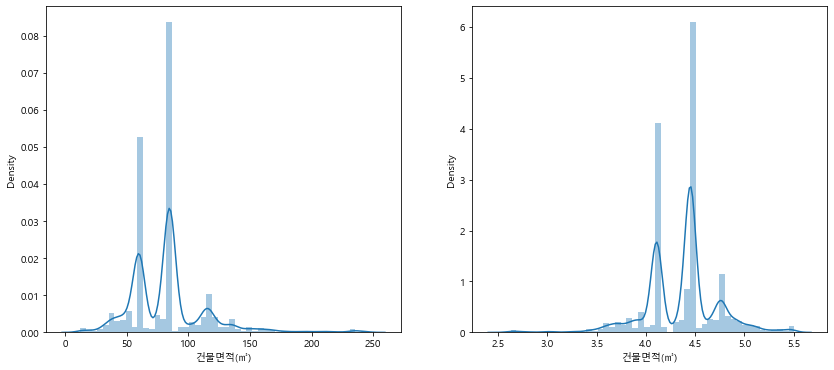

In [37]:
df = pd.read_csv("전처리 수치형 데이터.csv", encoding='cp949')
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df['건물면적(㎡)'], ax=ax1)
sns.distplot(np.log(df['건물면적(㎡)']+1), ax=ax2)

<AxesSubplot:xlabel='k-연면적', ylabel='Density'>

<AxesSubplot:xlabel='k-연면적', ylabel='Density'>

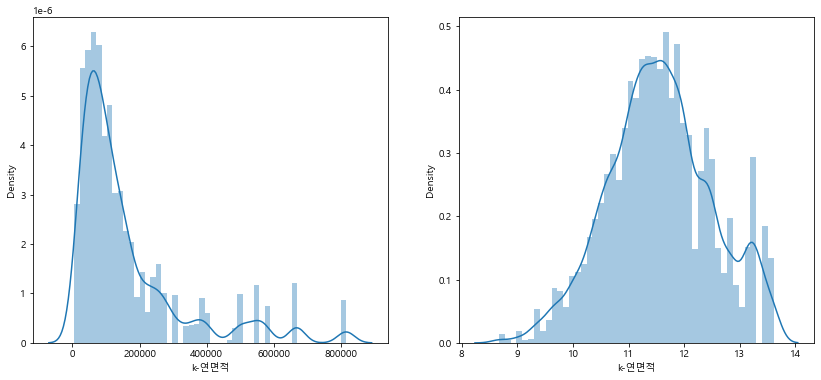

In [38]:
df = pd.read_csv("전처리 수치형 데이터.csv", encoding='cp949')
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df['k-연면적'], ax=ax1)
sns.distplot(np.log(df['k-연면적']+1), ax=ax2)

* 건물면적과 연면적 모두 로그를 취한 후 정규분포에 좀 더 가까운 형태로 바뀐 것을 그림을 통해 알 수 있음
* 따라서 모델링 과정에서 타겟변수 외에도 건물면적과 연면적 모두 로그 변환을 할 것임

# 구별 인구밀도 확인

In [58]:
df = pd.read_csv("전처리 수치형 데이터.csv", encoding='cp949')
df = df[['자치구코드','법정동코드','건물명','k-아파트코드','자치구명','법정동명','좌표X','좌표Y','물건금액(만원)','건물면적(㎡)',
        'k-연면적','층','건축년도','건물용도','k-세대타입(분양형태)','k-복도유형','k-난방방식','세대전기계약방법']]

gu = pd.read_csv("구별 모든 정보.csv")
df_merge = pd.merge(df, gu, left_on='자치구명',right_on ='구별')
df_merge = df_merge.drop(['구별','연도'], axis=1)

df_sel = df_merge.iloc[:,6:]
from sklearn.preprocessing import MinMaxScaler

df_numer = df_sel[['좌표X','좌표Y','물건금액(만원)','건물면적(㎡)','k-연면적','층','건축년도','발생','지하철역개수','병원수',
                  '구별인구','구별면적','구별인구밀도']]


minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_numer)
scaled = minmax_scaler.transform(df_numer)
scaled = pd.DataFrame(scaled)

scaled.columns = ['좌표X','좌표Y','물건금액(만원)','건물면적(㎡)','k-연면적','층','건축년도','발생','지하철역개수','병원수',
                  '구별인구','구별면적','구별인구밀도']

MinMaxScaler()

<AxesSubplot:>

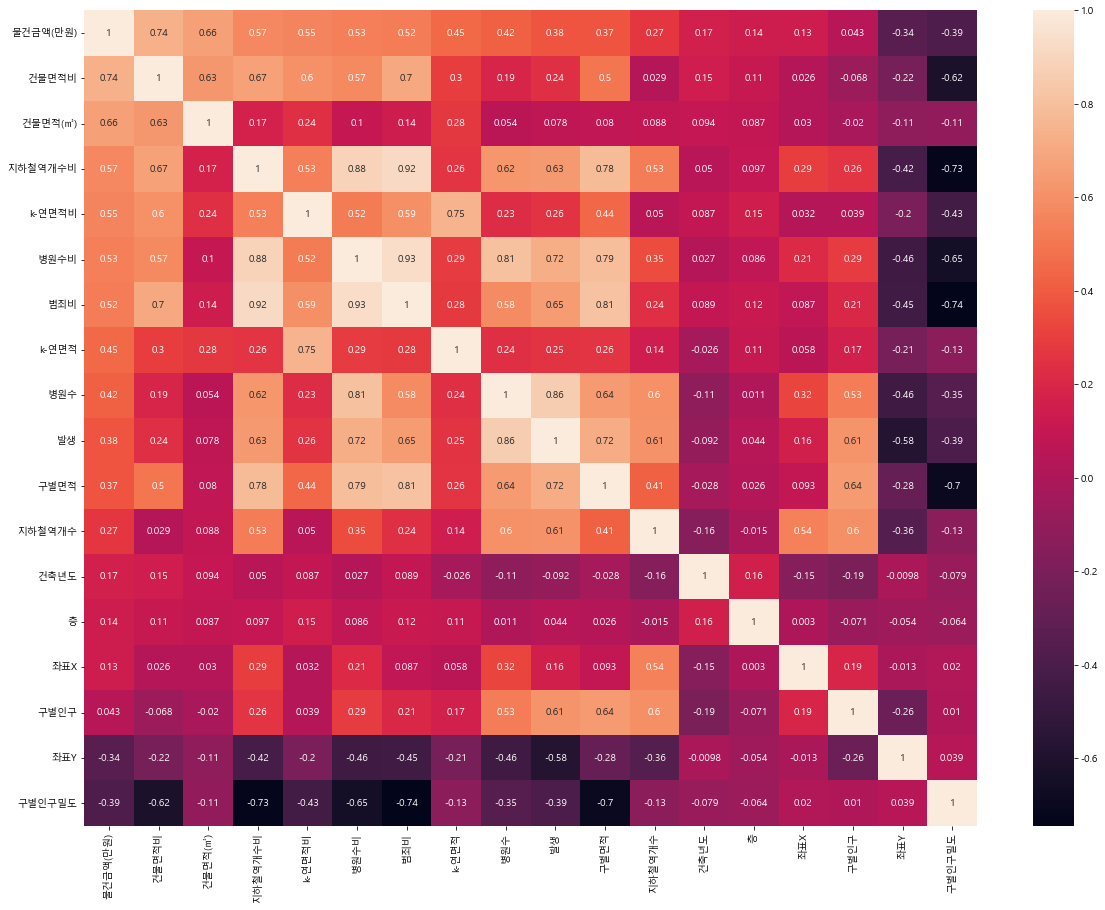

In [59]:
scaled['범죄비'] = scaled['발생']/scaled['구별인구밀도']
scaled['병원수비'] = scaled['병원수']/scaled['구별인구밀도']
scaled['지하철역개수비'] = scaled['지하철역개수']/scaled['구별인구밀도']
scaled['건물면적비'] = scaled['건물면적(㎡)']/scaled['구별인구밀도']
scaled['k-연면적비'] = scaled['k-연면적']/scaled['구별인구밀도']

corr=scaled.corr()
top_corr=scaled[corr.nlargest(40,'물건금액(만원)')['물건금액(만원)'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

* 건물면적비와 연먼적비가 모두 원래 변수보다 높은 것을 확인할 수 있음 
* 다른 병원수와 범죄비, 지하철 역개수는 모두 구별 기준으로 병합하였기 때문에 라벨인코딩할 경우 효과가 크지 않을 것으로 판단하여 제외하였음.

# 원핫 인코딩 모델

In [63]:
data = pd.read_csv("전처리 수치형 데이터.csv", encoding='cp949')
data_sel = data[['물건금액(만원)','건물면적(㎡)','k-연면적','층','건축년도','자치구명','법정동명',
           '건물용도','k-세대타입(분양형태)','k-복도유형','k-난방방식','k-단지분류(아파트,주상복합등등)']]

data_sel.loc[data_sel['k-단지분류(아파트,주상복합등등)']=='도시형 생활주택(주상복합)', '건물용도']='도시형 생활주택(주상복합)'

data_gu = pd.read_csv("구별 모든 정보.csv")
gu = data_gu[['구별','구별인구밀도']]
gu.columns = ['자치구명','구별인구밀도']
df = pd.merge(data_sel, gu, on='자치구명')

df['물건금액(만원)'] = np.log(df['물건금액(만원)'])
df['k-연면적비'] = np.log(df['k-연면적']/df['구별인구밀도'])
df['건물면적비'] = np.log(df['건물면적(㎡)']/df['구별인구밀도'])

#df['k-연면적비'] = df['k-연면적']/df['구별인구밀도']
#df['건물면적비'] = df['건물면적(㎡)']/df['구별인구밀도']



df = df.drop(['k-단지분류(아파트,주상복합등등)','구별인구밀도'], axis=1)

df_dummy = pd.get_dummies(df)
df_dummy = df_dummy.dropna()

X = df_dummy.drop('물건금액(만원)', axis=1)
y = df_dummy[['물건금액(만원)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

regressors = [
    
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    XGBRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42)
    
]

lst = ['KNeighborsRegressor','RandomForestRegressor','ExtraTreesRegressor','XGBRegressor','CatBoostRegressor']

head = 20
for model in regressors[:head]:
        
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    #print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tTotal time: %0.3fs" % (predict_time+train_time))
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMAE:", mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print("\tRMSE:", np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

StandardScaler()

KNeighborsRegressor()

	Training time: 0.011s
	Prediction time: 1.122s
	Total time: 1.133s
	MAE: 7049.487290643645
	RMSE: 11798.247704383497
	R2 score: 0.9691059085204098



DecisionTreeRegressor(random_state=42)

	Training time: 0.281s
	Prediction time: 0.004s
	Total time: 0.285s
	MAE: 7047.171530689977
	RMSE: 12476.538685255751
	R2 score: 0.9717408821209225



RandomForestRegressor(random_state=42)

	Training time: 15.666s
	Prediction time: 0.137s
	Total time: 15.803s
	MAE: 5972.066017254148
	RMSE: 10374.27261362516
	R2 score: 0.9821516562859197



ExtraTreesRegressor(random_state=42)

	Training time: 18.829s
	Prediction time: 0.169s
	Total time: 18.998s
	MAE: 6083.7366610593635
	RMSE: 10175.285896178028
	R2 score: 0.9819654642185772



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

	Training time: 5.229s
	Prediction time: 0.040s
	Total time: 5.269s
	MAE: 6179.3876865931925
	RMSE: 9962.829380351592
	R2 score: 0.9815123058869758

Learning rate set to 0.058343
0:	learn: 0.5612744	total: 177ms	remaining: 2m 56s
1:	learn: 0.5395829	total: 190ms	remaining: 1m 34s
2:	learn: 0.5190710	total: 199ms	remaining: 1m 5s
3:	learn: 0.5001333	total: 207ms	remaining: 51.6s
4:	learn: 0.4814815	total: 218ms	remaining: 43.3s
5:	learn: 0.4646459	total: 224ms	remaining: 37.2s
6:	learn: 0.4490563	total: 233ms	remaining: 33.1s
7:	learn: 0.4338295	total: 239ms	remaining: 29.6s
8:	learn: 0.4197327	total: 247ms	remaining: 27.1s
9:	learn: 0.4067624	total: 253ms	remaining: 25s
10:	learn: 0.3949022	total: 258ms	remaining: 23.2s
11:	learn: 0.3831297	total: 266ms	remaining: 21.9s
12:	learn: 0.3727684	total: 272ms	remaining: 20.6s
13:	learn: 0.3626710	total: 280ms	remaining: 19.7s
14:	learn: 0.3540396	total: 286ms	remaining: 18.8s
15:	learn: 0.3451831	total: 294ms	remaining: 18.1s
16:	learn: 0.33

159:	learn: 0.1380524	total: 1.42s	remaining: 7.46s
160:	learn: 0.1377596	total: 1.43s	remaining: 7.47s
161:	learn: 0.1375243	total: 1.45s	remaining: 7.51s
162:	learn: 0.1372280	total: 1.46s	remaining: 7.49s
163:	learn: 0.1369913	total: 1.47s	remaining: 7.48s
164:	learn: 0.1367432	total: 1.47s	remaining: 7.46s
165:	learn: 0.1365001	total: 1.51s	remaining: 7.58s
166:	learn: 0.1362326	total: 1.52s	remaining: 7.58s
167:	learn: 0.1358093	total: 1.53s	remaining: 7.59s
168:	learn: 0.1353887	total: 1.54s	remaining: 7.59s
169:	learn: 0.1350044	total: 1.55s	remaining: 7.59s
170:	learn: 0.1347328	total: 1.56s	remaining: 7.58s
171:	learn: 0.1344823	total: 1.57s	remaining: 7.56s
172:	learn: 0.1341959	total: 1.58s	remaining: 7.55s
173:	learn: 0.1339635	total: 1.58s	remaining: 7.53s
174:	learn: 0.1336466	total: 1.59s	remaining: 7.51s
175:	learn: 0.1334181	total: 1.6s	remaining: 7.5s
176:	learn: 0.1330521	total: 1.61s	remaining: 7.51s
177:	learn: 0.1328145	total: 1.62s	remaining: 7.48s
178:	learn: 0.

318:	learn: 0.1066888	total: 2.7s	remaining: 5.77s
319:	learn: 0.1065261	total: 2.71s	remaining: 5.76s
320:	learn: 0.1064541	total: 2.72s	remaining: 5.75s
321:	learn: 0.1063314	total: 2.73s	remaining: 5.74s
322:	learn: 0.1061386	total: 2.73s	remaining: 5.73s
323:	learn: 0.1060268	total: 2.74s	remaining: 5.72s
324:	learn: 0.1059199	total: 2.75s	remaining: 5.7s
325:	learn: 0.1058155	total: 2.75s	remaining: 5.69s
326:	learn: 0.1056288	total: 2.76s	remaining: 5.68s
327:	learn: 0.1054339	total: 2.76s	remaining: 5.66s
328:	learn: 0.1053576	total: 2.77s	remaining: 5.65s
329:	learn: 0.1052478	total: 2.78s	remaining: 5.64s
330:	learn: 0.1051357	total: 2.78s	remaining: 5.62s
331:	learn: 0.1050570	total: 2.79s	remaining: 5.61s
332:	learn: 0.1049098	total: 2.8s	remaining: 5.6s
333:	learn: 0.1048238	total: 2.8s	remaining: 5.59s
334:	learn: 0.1047480	total: 2.81s	remaining: 5.58s
335:	learn: 0.1045316	total: 2.82s	remaining: 5.57s
336:	learn: 0.1044317	total: 2.83s	remaining: 5.56s
337:	learn: 0.104

479:	learn: 0.0910143	total: 4.17s	remaining: 4.51s
480:	learn: 0.0909830	total: 4.17s	remaining: 4.5s
481:	learn: 0.0909023	total: 4.18s	remaining: 4.49s
482:	learn: 0.0908388	total: 4.19s	remaining: 4.48s
483:	learn: 0.0907413	total: 4.2s	remaining: 4.47s
484:	learn: 0.0906367	total: 4.2s	remaining: 4.46s
485:	learn: 0.0905876	total: 4.21s	remaining: 4.45s
486:	learn: 0.0905136	total: 4.21s	remaining: 4.44s
487:	learn: 0.0904676	total: 4.22s	remaining: 4.43s
488:	learn: 0.0903874	total: 4.23s	remaining: 4.42s
489:	learn: 0.0903571	total: 4.23s	remaining: 4.41s
490:	learn: 0.0902912	total: 4.24s	remaining: 4.39s
491:	learn: 0.0901776	total: 4.25s	remaining: 4.38s
492:	learn: 0.0901172	total: 4.25s	remaining: 4.37s
493:	learn: 0.0900200	total: 4.26s	remaining: 4.36s
494:	learn: 0.0899724	total: 4.26s	remaining: 4.35s
495:	learn: 0.0899393	total: 4.27s	remaining: 4.34s
496:	learn: 0.0898992	total: 4.27s	remaining: 4.33s
497:	learn: 0.0898486	total: 4.28s	remaining: 4.32s
498:	learn: 0.0

647:	learn: 0.0814348	total: 5.44s	remaining: 2.95s
648:	learn: 0.0814179	total: 5.44s	remaining: 2.94s
649:	learn: 0.0813798	total: 5.46s	remaining: 2.94s
650:	learn: 0.0813518	total: 5.47s	remaining: 2.93s
651:	learn: 0.0812967	total: 5.47s	remaining: 2.92s
652:	learn: 0.0812170	total: 5.48s	remaining: 2.91s
653:	learn: 0.0811791	total: 5.49s	remaining: 2.9s
654:	learn: 0.0811505	total: 5.5s	remaining: 2.9s
655:	learn: 0.0811007	total: 5.51s	remaining: 2.89s
656:	learn: 0.0810576	total: 5.52s	remaining: 2.88s
657:	learn: 0.0810082	total: 5.53s	remaining: 2.87s
658:	learn: 0.0809809	total: 5.53s	remaining: 2.86s
659:	learn: 0.0809226	total: 5.54s	remaining: 2.86s
660:	learn: 0.0808996	total: 5.55s	remaining: 2.85s
661:	learn: 0.0808626	total: 5.56s	remaining: 2.84s
662:	learn: 0.0808328	total: 5.57s	remaining: 2.83s
663:	learn: 0.0807786	total: 5.58s	remaining: 2.82s
664:	learn: 0.0807436	total: 5.58s	remaining: 2.81s
665:	learn: 0.0807138	total: 5.59s	remaining: 2.8s
666:	learn: 0.08

813:	learn: 0.0754347	total: 6.7s	remaining: 1.53s
814:	learn: 0.0754044	total: 6.71s	remaining: 1.52s
815:	learn: 0.0753688	total: 6.72s	remaining: 1.51s
816:	learn: 0.0753286	total: 6.72s	remaining: 1.5s
817:	learn: 0.0752802	total: 6.73s	remaining: 1.5s
818:	learn: 0.0752452	total: 6.74s	remaining: 1.49s
819:	learn: 0.0752212	total: 6.74s	remaining: 1.48s
820:	learn: 0.0751873	total: 6.75s	remaining: 1.47s
821:	learn: 0.0751773	total: 6.75s	remaining: 1.46s
822:	learn: 0.0751604	total: 6.76s	remaining: 1.45s
823:	learn: 0.0751327	total: 6.77s	remaining: 1.45s
824:	learn: 0.0750713	total: 6.77s	remaining: 1.44s
825:	learn: 0.0750305	total: 6.78s	remaining: 1.43s
826:	learn: 0.0750092	total: 6.79s	remaining: 1.42s
827:	learn: 0.0749888	total: 6.8s	remaining: 1.41s
828:	learn: 0.0749777	total: 6.8s	remaining: 1.4s
829:	learn: 0.0749334	total: 6.81s	remaining: 1.4s
830:	learn: 0.0749052	total: 6.82s	remaining: 1.39s
831:	learn: 0.0748671	total: 6.83s	remaining: 1.38s
832:	learn: 0.07485

999:	learn: 0.0710354	total: 7.96s	remaining: 0us


	Training time: 8.656s
	Prediction time: 0.018s
	Total time: 8.673s
	MAE: 6124.355144268549
	RMSE: 9869.169546117368
	R2 score: 0.9823561924950127



# 레이블 인코딩 후 모델링

In [65]:
data = pd.read_csv("전처리 수치형 데이터.csv", encoding='cp949')
data_sel = data[['물건금액(만원)','건물면적(㎡)','k-연면적','층','건축년도','자치구명','법정동명',
           '건물용도','k-세대타입(분양형태)','k-복도유형','k-난방방식','세대전기계약방법','k-단지분류(아파트,주상복합등등)']]

data_sel.loc[data_sel['k-단지분류(아파트,주상복합등등)']=='도시형 생활주택(주상복합)', '건물용도']='도시형 생활주택(주상복합)'

data_gu = pd.read_csv("구별 모든 정보.csv")
gu = data_gu[['구별','구별인구밀도']]
gu.columns = ['자치구명','구별인구밀도']
df = pd.merge(data_sel, gu, on='자치구명')

df['물건금액(만원)'] = np.log(df['물건금액(만원)'])
df['k-연면적비'] = np.log(df['k-연면적']/df['구별인구밀도'])
df['건물면적비'] = np.log(df['건물면적(㎡)']/df['구별인구밀도'])


#df['k-연면적비'] = df['k-연면적']/df['구별인구밀도']
#df['건물면적비'] = df['건물면적(㎡)']/df['구별인구밀도']


df = df.drop(['k-단지분류(아파트,주상복합등등)','k-연면적','건물면적(㎡)','구별인구밀도'], axis=1)

label_obj_list = ['자치구명','법정동명','층','건축년도','건물용도','k-세대타입(분양형태)','k-복도유형','k-난방방식','세대전기계약방법']
df_sel = df.dropna()
       
from sklearn.preprocessing import LabelEncoder

for obj in label_obj_list:
    encoder = LabelEncoder()
    encoder.fit(list(df_sel[obj].values))
    df_sel[obj] = encoder.transform(list(df_sel[obj].values))
    
X = df_sel.drop('물건금액(만원)', axis=1)
y = df_sel[['물건금액(만원)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

regressors = [

    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    XGBRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42)
    
    
]



head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    #print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tTotal time: %0.3fs" % (predict_time+train_time))
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMAE:", mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print("\tRMSE:", np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()
np.exp(mean_absolute_error(y_test, y_pred))

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

StandardScaler()

KNeighborsRegressor()

	Training time: 0.054s
	Prediction time: 0.205s
	Total time: 0.259s
	MAE: 8516.844416716749
	RMSE: 15336.538490798104
	R2 score: 0.9557081830845495



DecisionTreeRegressor(random_state=42)

	Training time: 0.075s
	Prediction time: 0.002s
	Total time: 0.077s
	MAE: 7481.490773252005
	RMSE: 13458.858832290798
	R2 score: 0.9680318654195414



RandomForestRegressor(random_state=42)

	Training time: 3.998s
	Prediction time: 0.127s
	Total time: 4.125s
	MAE: 6476.412435788055
	RMSE: 10870.44990633121
	R2 score: 0.9779374251236124



ExtraTreesRegressor(random_state=42)

	Training time: 2.789s
	Prediction time: 0.123s
	Total time: 2.912s
	MAE: 6546.813190181937
	RMSE: 11013.428513001445
	R2 score: 0.9798707460520708



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

	Training time: 0.840s
	Prediction time: 0.013s
	Total time: 0.853s
	MAE: 6211.649528544072
	RMSE: 10154.196569148598
	R2 score: 0.9824818887713793

Learning rate set to 0.057943
0:	learn: 0.5705445	total: 4.36ms	remaining: 4.35s
1:	learn: 0.5499407	total: 8.62ms	remaining: 4.3s
2:	learn: 0.5303141	total: 13.1ms	remaining: 4.35s
3:	learn: 0.5132131	total: 17.7ms	remaining: 4.42s
4:	learn: 0.4952792	total: 22ms	remaining: 4.38s
5:	learn: 0.4791641	total: 26.7ms	remaining: 4.42s
6:	learn: 0.4642304	total: 31.8ms	remaining: 4.5s
7:	learn: 0.4501494	total: 36.2ms	remaining: 4.49s
8:	learn: 0.4367520	total: 40.5ms	remaining: 4.46s
9:	learn: 0.4237627	total: 44.6ms	remaining: 4.41s
10:	learn: 0.4117217	total: 48.9ms	remaining: 4.39s
11:	learn: 0.4002152	total: 52.9ms	remaining: 4.36s
12:	learn: 0.3896324	total: 56.9ms	remaining: 4.32s
13:	learn: 0.3796816	total: 60.8ms	remaining: 4.28s
14:	learn: 0.3705029	total: 64.9ms	remaining: 4.26s
15:	learn: 0.3618206	total: 69.2ms	remaining: 4.26s
16:

158:	learn: 0.1383255	total: 825ms	remaining: 4.37s
159:	learn: 0.1379150	total: 830ms	remaining: 4.36s
160:	learn: 0.1373969	total: 835ms	remaining: 4.35s
161:	learn: 0.1371480	total: 839ms	remaining: 4.34s
162:	learn: 0.1367111	total: 845ms	remaining: 4.34s
163:	learn: 0.1364740	total: 851ms	remaining: 4.34s
164:	learn: 0.1362195	total: 855ms	remaining: 4.33s
165:	learn: 0.1358896	total: 860ms	remaining: 4.32s
166:	learn: 0.1353714	total: 864ms	remaining: 4.31s
167:	learn: 0.1352014	total: 868ms	remaining: 4.3s
168:	learn: 0.1348306	total: 872ms	remaining: 4.29s
169:	learn: 0.1345402	total: 878ms	remaining: 4.29s
170:	learn: 0.1341752	total: 882ms	remaining: 4.27s
171:	learn: 0.1340347	total: 886ms	remaining: 4.26s
172:	learn: 0.1337874	total: 891ms	remaining: 4.26s
173:	learn: 0.1333880	total: 895ms	remaining: 4.25s
174:	learn: 0.1331334	total: 899ms	remaining: 4.24s
175:	learn: 0.1325424	total: 903ms	remaining: 4.23s
176:	learn: 0.1321163	total: 908ms	remaining: 4.22s
177:	learn: 0

339:	learn: 0.0991041	total: 1.71s	remaining: 3.31s
340:	learn: 0.0990124	total: 1.71s	remaining: 3.31s
341:	learn: 0.0988288	total: 1.72s	remaining: 3.3s
342:	learn: 0.0987443	total: 1.72s	remaining: 3.3s
343:	learn: 0.0986815	total: 1.73s	remaining: 3.3s
344:	learn: 0.0983693	total: 1.74s	remaining: 3.29s
345:	learn: 0.0983405	total: 1.74s	remaining: 3.29s
346:	learn: 0.0982055	total: 1.75s	remaining: 3.29s
347:	learn: 0.0981716	total: 1.75s	remaining: 3.28s
348:	learn: 0.0979832	total: 1.76s	remaining: 3.29s
349:	learn: 0.0978532	total: 1.77s	remaining: 3.29s
350:	learn: 0.0977660	total: 1.78s	remaining: 3.29s
351:	learn: 0.0976214	total: 1.78s	remaining: 3.28s
352:	learn: 0.0974820	total: 1.79s	remaining: 3.27s
353:	learn: 0.0973288	total: 1.79s	remaining: 3.27s
354:	learn: 0.0972525	total: 1.8s	remaining: 3.27s
355:	learn: 0.0971264	total: 1.8s	remaining: 3.27s
356:	learn: 0.0970686	total: 1.81s	remaining: 3.26s
357:	learn: 0.0969118	total: 1.81s	remaining: 3.25s
358:	learn: 0.096

525:	learn: 0.0822940	total: 2.58s	remaining: 2.33s
526:	learn: 0.0822521	total: 2.59s	remaining: 2.32s
527:	learn: 0.0822098	total: 2.6s	remaining: 2.32s
528:	learn: 0.0821453	total: 2.6s	remaining: 2.31s
529:	learn: 0.0821005	total: 2.61s	remaining: 2.31s
530:	learn: 0.0820360	total: 2.61s	remaining: 2.31s
531:	learn: 0.0819612	total: 2.62s	remaining: 2.3s
532:	learn: 0.0819015	total: 2.63s	remaining: 2.3s
533:	learn: 0.0817974	total: 2.63s	remaining: 2.3s
534:	learn: 0.0817570	total: 2.64s	remaining: 2.29s
535:	learn: 0.0816953	total: 2.64s	remaining: 2.29s
536:	learn: 0.0816716	total: 2.65s	remaining: 2.28s
537:	learn: 0.0815888	total: 2.65s	remaining: 2.28s
538:	learn: 0.0815294	total: 2.66s	remaining: 2.27s
539:	learn: 0.0814845	total: 2.66s	remaining: 2.27s
540:	learn: 0.0813894	total: 2.67s	remaining: 2.26s
541:	learn: 0.0813533	total: 2.67s	remaining: 2.26s
542:	learn: 0.0812756	total: 2.67s	remaining: 2.25s
543:	learn: 0.0812104	total: 2.68s	remaining: 2.24s
544:	learn: 0.081

699:	learn: 0.0742156	total: 3.46s	remaining: 1.48s
700:	learn: 0.0741891	total: 3.46s	remaining: 1.48s
701:	learn: 0.0741688	total: 3.46s	remaining: 1.47s
702:	learn: 0.0741293	total: 3.47s	remaining: 1.47s
703:	learn: 0.0741002	total: 3.48s	remaining: 1.46s
704:	learn: 0.0740936	total: 3.48s	remaining: 1.46s
705:	learn: 0.0740502	total: 3.49s	remaining: 1.45s
706:	learn: 0.0740106	total: 3.5s	remaining: 1.45s
707:	learn: 0.0739998	total: 3.5s	remaining: 1.44s
708:	learn: 0.0739697	total: 3.51s	remaining: 1.44s
709:	learn: 0.0739397	total: 3.51s	remaining: 1.44s
710:	learn: 0.0739164	total: 3.52s	remaining: 1.43s
711:	learn: 0.0738809	total: 3.53s	remaining: 1.43s
712:	learn: 0.0738696	total: 3.53s	remaining: 1.42s
713:	learn: 0.0738394	total: 3.54s	remaining: 1.42s
714:	learn: 0.0738188	total: 3.54s	remaining: 1.41s
715:	learn: 0.0737693	total: 3.55s	remaining: 1.41s
716:	learn: 0.0737246	total: 3.56s	remaining: 1.4s
717:	learn: 0.0736916	total: 3.56s	remaining: 1.4s
718:	learn: 0.07

869:	learn: 0.0695213	total: 4.34s	remaining: 649ms
870:	learn: 0.0694904	total: 4.35s	remaining: 644ms
871:	learn: 0.0694710	total: 4.35s	remaining: 639ms
872:	learn: 0.0694507	total: 4.36s	remaining: 634ms
873:	learn: 0.0694432	total: 4.36s	remaining: 629ms
874:	learn: 0.0694132	total: 4.37s	remaining: 624ms
875:	learn: 0.0693958	total: 4.37s	remaining: 619ms
876:	learn: 0.0693616	total: 4.38s	remaining: 614ms
877:	learn: 0.0693324	total: 4.38s	remaining: 609ms
878:	learn: 0.0692988	total: 4.38s	remaining: 604ms
879:	learn: 0.0692739	total: 4.39s	remaining: 599ms
880:	learn: 0.0692571	total: 4.39s	remaining: 593ms
881:	learn: 0.0692397	total: 4.4s	remaining: 588ms
882:	learn: 0.0692143	total: 4.4s	remaining: 583ms
883:	learn: 0.0691891	total: 4.41s	remaining: 578ms
884:	learn: 0.0691698	total: 4.41s	remaining: 573ms
885:	learn: 0.0691511	total: 4.41s	remaining: 568ms
886:	learn: 0.0691398	total: 4.42s	remaining: 563ms
887:	learn: 0.0691209	total: 4.42s	remaining: 558ms
888:	learn: 0.

	Training time: 5.511s
	Prediction time: 0.009s
	Total time: 5.519s
	MAE: 6134.224240733634
	RMSE: 9981.688005249121
	R2 score: 0.982748737578792



1.0604159484738946